### Customer Churn Prediction Project

#### **Project Overview**
Customer churn refers to the phenomenon where customers stop doing business with a company. This project aims to predict customer churn for a telecom company using the Telco Customer Churn dataset. By identifying key factors contributing to churn, the company can implement strategies to retain customers. The project uses Logistic Regression for classification and provides insights into important features influencing churn.

---

#### **Importing Libraries**

In [14]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

#### **Loading the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
print(df.head())

# Check data info and statistics
print(df.info())
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**Explanation:**
- The dataset contains customer information, including demographics, account details, and service usage.
- The target variable is `Churn`, indicating whether a customer has left the company.

---

#### **Data Cleaning and Preprocessing**

In [4]:
# Drop irrelevant column
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# Handle missing values
# Convert 'TotalCharges' to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Check for null values after preprocessing
print(df.isnull().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

**Explanation:**
- `customerID` is irrelevant for prediction and is dropped.
- `TotalCharges` is converted to numeric, and missing values are replaced with the mean.
- Categorical variables are transformed into dummy variables for model compatibility.

---

#### **Defining Features and Target**

In [5]:
# Define features (X) and target (y)
X = df.drop('Churn_Yes', axis=1)  # Features
y = df['Churn_Yes']              # Target (1 = churn, 0 = no churn)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Explanation:**
- Features (`X`) include all variables except the target.
- The target (`y`) is the binary `Churn_Yes` column.
- Data is split into training (80%) and testing (20%) sets for model evaluation.

---

#### **Training the Logistic Regression Model**

In [6]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

**Explanation:**
- Logistic Regression is chosen for its simplicity and interpretability.
- The model is trained on the training data and tested on unseen data.

---

#### **Evaluating the Model**

Accuracy: 0.8218594748048261
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



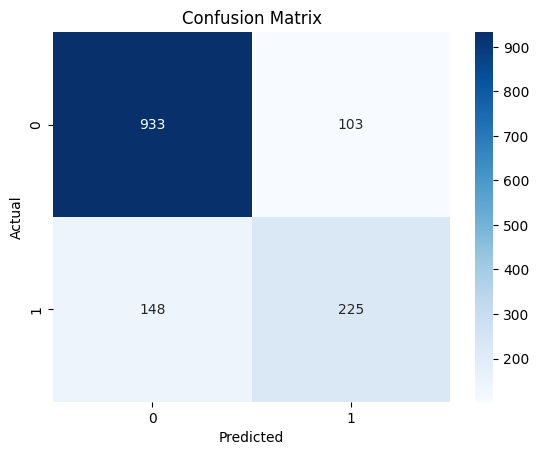

In [7]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Explanation:**
- Accuracy measures the proportion of correct predictions.
- The classification report provides precision, recall, and F1-score.
- The confusion matrix visualizes true positives, true negatives, false positives, and false negatives.

---

#### **Analyzing Feature Importance**

                           Feature  Importance
10     InternetService_Fiber optic    0.648229
26            PaperlessBilling_Yes    0.338511
28  PaymentMethod_Electronic check    0.326860
8   MultipleLines_No phone service    0.265590
23             StreamingMovies_Yes    0.230880
9                MultipleLines_Yes    0.220871
0                    SeniorCitizen    0.161823
21                 StreamingTV_Yes    0.128750
5                      Partner_Yes    0.057582
2                   MonthlyCharges    0.003117


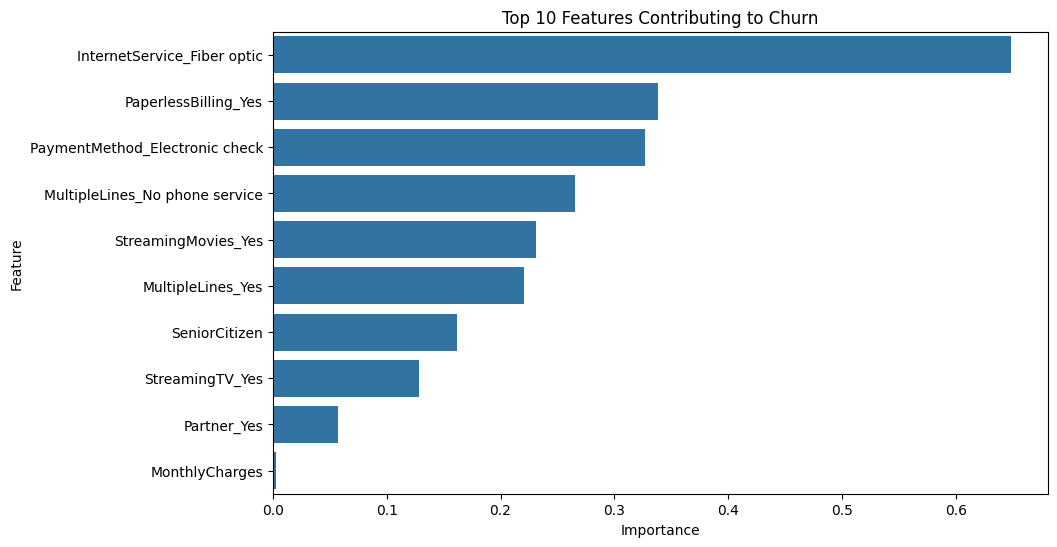

In [8]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features Contributing to Churn')
plt.show()

---

## **Advanced Model Comparison**

#### **Training Multiple Models**
Let's compare the performance of different machine learning algorithms to find the best model for churn prediction.

In [9]:
# Initialize multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Store results
model_results = {}
trained_models = {}

print("Training and evaluating models...")
print("=" * 50)

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    model_results[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("-" * 30)

Training and evaluating models...
Logistic Regression:
  Accuracy: 0.8219
  ROC-AUC: 0.8622
  CV Score: 0.8010 (+/- 0.0165)
------------------------------
Random Forest:
  Accuracy: 0.7921
  ROC-AUC: 0.8364
  CV Score: 0.7895 (+/- 0.0253)
------------------------------
Gradient Boosting:
  Accuracy: 0.8119
  ROC-AUC: 0.8625
  CV Score: 0.7994 (+/- 0.0222)
------------------------------
Decision Tree:
  Accuracy: 0.7097
  ROC-AUC: 0.6292
  CV Score: 0.7229 (+/- 0.0179)
------------------------------
Support Vector Machine:
  Accuracy: 0.7353
  ROC-AUC: 0.8159
  CV Score: 0.7345 (+/- 0.0007)
------------------------------


Model Comparison Results:
                    Model  Accuracy  ROC-AUC  CV_Mean  CV_Std
0     Logistic Regression    0.8219   0.8622   0.8010  0.0082
1           Random Forest    0.7921   0.8364   0.7895  0.0126
2       Gradient Boosting    0.8119   0.8625   0.7994  0.0111
3           Decision Tree    0.7097   0.6292   0.7229  0.0089
4  Support Vector Machine    0.7353   0.8159   0.7345  0.0003


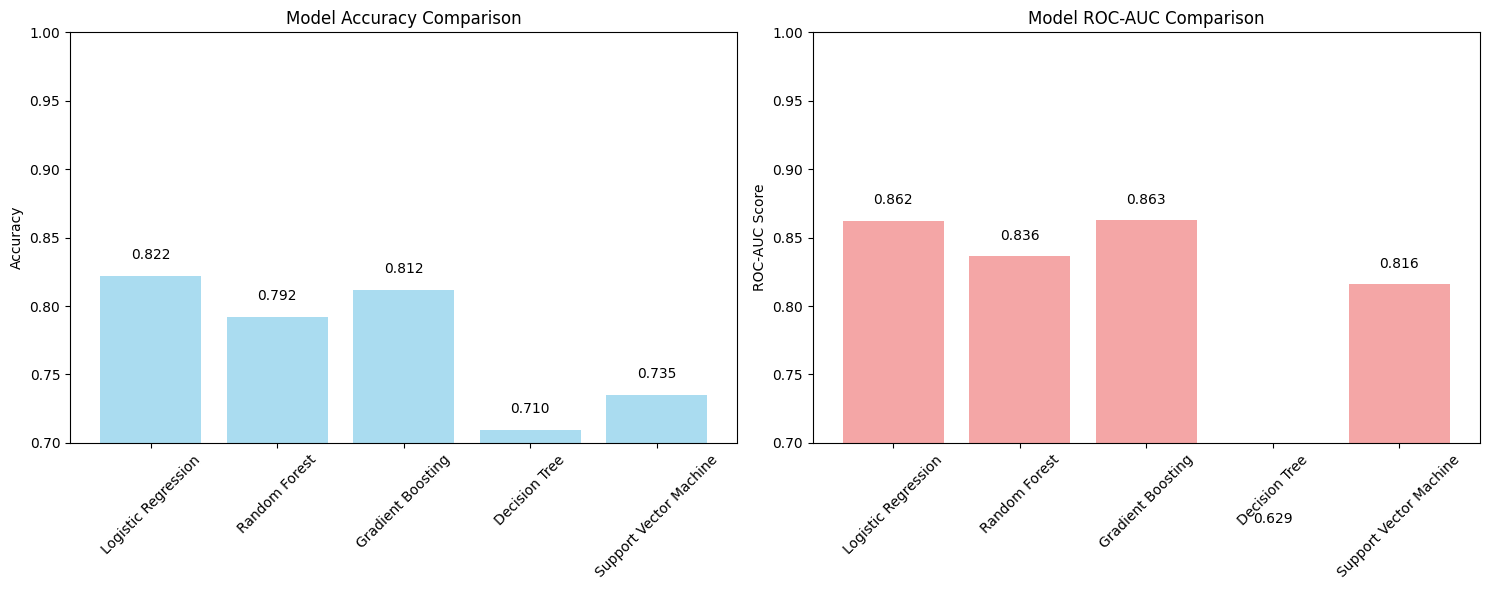


Best performing model: Gradient Boosting
ROC-AUC Score: 0.8625


In [10]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [results['accuracy'] for results in model_results.values()],
    'ROC-AUC': [results['roc_auc'] for results in model_results.values()],
    'CV_Mean': [results['cv_mean'] for results in model_results.values()],
    'CV_Std': [results['cv_std'] for results in model_results.values()]
})

# Display results table
print("Model Comparison Results:")
print("=" * 50)
print(comparison_df.round(4))

# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
axes[0].bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue', alpha=0.7)
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0.7, 1.0)

# Add accuracy values on bars
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# ROC-AUC comparison
axes[1].bar(comparison_df['Model'], comparison_df['ROC-AUC'], color='lightcoral', alpha=0.7)
axes[1].set_title('Model ROC-AUC Comparison')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0.7, 1.0)

# Add ROC-AUC values on bars
for i, v in enumerate(comparison_df['ROC-AUC']):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Find best performing model
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
print(f"\nBest performing model: {best_model_name}")
print(f"ROC-AUC Score: {comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'ROC-AUC']:.4f}")

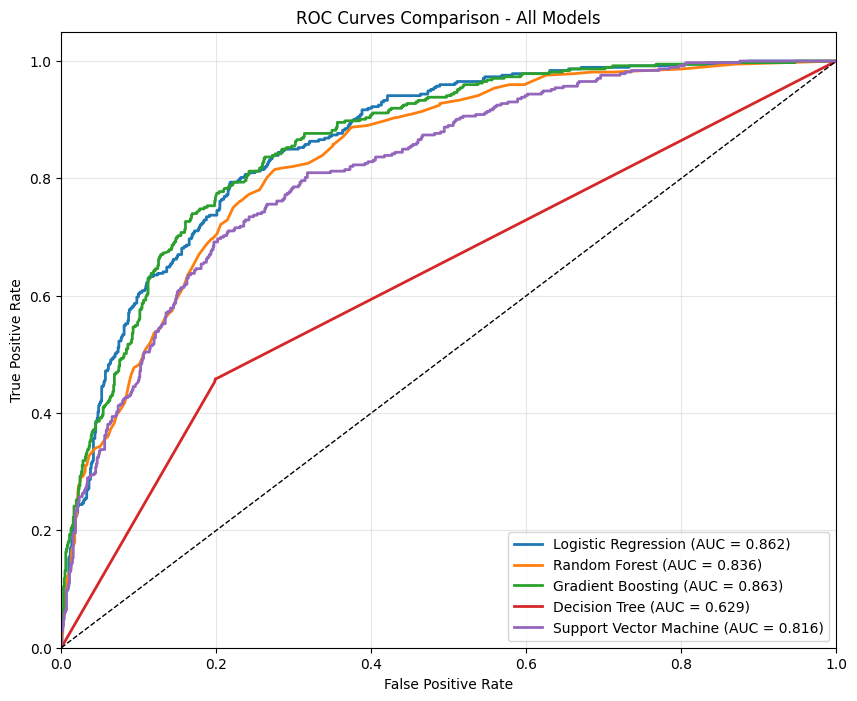

In [11]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, results in model_results.items():
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
    roc_auc = results['roc_auc']
    
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

---

## **Interactive Dashboard**

#### **Customer Churn Analysis Dashboard**
Let's create an interactive dashboard using Plotly to visualize customer churn patterns and model insights.

In [12]:
# Prepare data for dashboard visualizations
# Reload original data for dashboard (before preprocessing)
df_original = pd.read_csv('Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original['TotalCharges'] = df_original['TotalCharges'].fillna(df_original['TotalCharges'].mean())

# Create churn binary column
df_original['Churn_Binary'] = df_original['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate
churn_rate = df_original['Churn_Binary'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")

# Calculate some key metrics
total_customers = len(df_original)
churned_customers = df_original['Churn_Binary'].sum()
retained_customers = total_customers - churned_customers

print(f"Total Customers: {total_customers:,}")
print(f"Churned Customers: {churned_customers:,}")
print(f"Retained Customers: {retained_customers:,}")

Overall Churn Rate: 26.54%
Total Customers: 7,043
Churned Customers: 1,869
Retained Customers: 5,174


In [15]:
# Create KPI Dashboard
fig_kpi = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Churn Rate Overview', 'Customer Distribution', 'Revenue Impact', 'Model Performance'),
    specs=[[{"type": "indicator"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# KPI 1: Overall Churn Rate
fig_kpi.add_trace(
    go.Indicator(
        mode="gauge+number+delta",
        value=churn_rate * 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Churn Rate (%)"},
        delta={'reference': 25},  # Industry average benchmark
        gauge={
            'axis': {'range': [None, 50]},
            'bar': {'color': "darkred"},
            'steps': [
                {'range': [0, 15], 'color': "lightgreen"},
                {'range': [15, 25], 'color': "yellow"},
                {'range': [25, 50], 'color': "red"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 25
            }
        }
    ),
    row=1, col=1
)

# KPI 2: Customer Distribution Pie Chart
fig_kpi.add_trace(
    go.Pie(
        labels=['Retained', 'Churned'],
        values=[retained_customers, churned_customers],
        hole=0.4,
        marker_colors=['lightgreen', 'lightcoral']
    ),
    row=1, col=2
)

# KPI 3: Revenue Impact by Churn
revenue_by_churn = df_original.groupby('Churn')['TotalCharges'].sum().reset_index()
fig_kpi.add_trace(
    go.Bar(
        x=revenue_by_churn['Churn'],
        y=revenue_by_churn['TotalCharges'],
        marker_color=['lightgreen', 'lightcoral'],
        text=[f'${x:,.0f}' for x in revenue_by_churn['TotalCharges']],
        textposition='outside'
    ),
    row=2, col=1
)

# KPI 4: Model Performance Comparison
model_names = list(model_results.keys())
model_scores = [results['roc_auc'] for results in model_results.values()]

fig_kpi.add_trace(
    go.Bar(
        x=model_names,
        y=model_scores,
        marker_color='lightblue',
        text=[f'{x:.3f}' for x in model_scores],
        textposition='outside'
    ),
    row=2, col=2
)

# Update layout
fig_kpi.update_layout(
    title_text="Customer Churn Analysis - Key Performance Indicators",
    height=800,
    showlegend=False
)

fig_kpi.update_xaxes(title_text="Churn Status", row=2, col=1)
fig_kpi.update_yaxes(title_text="Total Revenue ($)", row=2, col=1)
fig_kpi.update_xaxes(title_text="Models", row=2, col=2)
fig_kpi.update_yaxes(title_text="ROC-AUC Score", row=2, col=2)

fig_kpi.show()

In [16]:
# Interactive Churn Analysis by Demographics
fig_demo = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Churn by Gender', 'Churn by Senior Citizen', 'Churn by Contract Type', 'Churn by Internet Service'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Calculate churn rates by different categories
def calculate_churn_rate(df, column):
    churn_data = df.groupby([column, 'Churn']).size().unstack(fill_value=0)
    churn_data['Total'] = churn_data.sum(axis=1)
    churn_data['Churn_Rate'] = churn_data['Yes'] / churn_data['Total'] * 100
    return churn_data

# 1. Churn by Gender
gender_churn = calculate_churn_rate(df_original, 'gender')
fig_demo.add_trace(
    go.Bar(
        x=gender_churn.index,
        y=gender_churn['Churn_Rate'],
        name='Gender',
        marker_color='lightblue',
        text=[f'{x:.1f}%' for x in gender_churn['Churn_Rate']],
        textposition='outside'
    ),
    row=1, col=1
)

# 2. Churn by Senior Citizen
senior_churn = calculate_churn_rate(df_original, 'SeniorCitizen')
senior_labels = ['Non-Senior', 'Senior'] if len(senior_churn.index) == 2 else senior_churn.index
fig_demo.add_trace(
    go.Bar(
        x=senior_labels,
        y=senior_churn['Churn_Rate'],
        name='Senior Citizen',
        marker_color='lightgreen',
        text=[f'{x:.1f}%' for x in senior_churn['Churn_Rate']],
        textposition='outside'
    ),
    row=1, col=2
)

# 3. Churn by Contract Type
contract_churn = calculate_churn_rate(df_original, 'Contract')
fig_demo.add_trace(
    go.Bar(
        x=contract_churn.index,
        y=contract_churn['Churn_Rate'],
        name='Contract',
        marker_color='lightcoral',
        text=[f'{x:.1f}%' for x in contract_churn['Churn_Rate']],
        textposition='outside'
    ),
    row=2, col=1
)

# 4. Churn by Internet Service
internet_churn = calculate_churn_rate(df_original, 'InternetService')
fig_demo.add_trace(
    go.Bar(
        x=internet_churn.index,
        y=internet_churn['Churn_Rate'],
        name='Internet Service',
        marker_color='lightyellow',
        text=[f'{x:.1f}%' for x in internet_churn['Churn_Rate']],
        textposition='outside'
    ),
    row=2, col=2
)

# Update layout
fig_demo.update_layout(
    title_text="Customer Churn Analysis by Demographics",
    height=800,
    showlegend=False
)

# Update axes
for i in range(1, 3):
    for j in range(1, 3):
        fig_demo.update_yaxes(title_text="Churn Rate (%)", row=i, col=j)

fig_demo.show()

In [17]:
# Interactive Tenure and Charges Analysis
fig_charges = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Monthly Charges vs Churn', 'Tenure Distribution', 'Total Charges vs Tenure', 'Churn by Payment Method'),
    specs=[[{"type": "box"}, {"type": "histogram"}],
           [{"type": "scatter"}, {"type": "bar"}]]
)

# 1. Monthly Charges by Churn (Box plot)
for churn_status in ['No', 'Yes']:
    data = df_original[df_original['Churn'] == churn_status]['MonthlyCharges']
    fig_charges.add_trace(
        go.Box(
            y=data,
            name=f'Churn: {churn_status}',
            boxpoints='outliers',
            marker_color='lightgreen' if churn_status == 'No' else 'lightcoral'
        ),
        row=1, col=1
    )

# 2. Tenure Distribution by Churn
for churn_status in ['No', 'Yes']:
    data = df_original[df_original['Churn'] == churn_status]['tenure']
    fig_charges.add_trace(
        go.Histogram(
            x=data,
            name=f'Churn: {churn_status}',
            opacity=0.7,
            nbinsx=20,
            marker_color='lightgreen' if churn_status == 'No' else 'lightcoral'
        ),
        row=1, col=2
    )

# 3. Total Charges vs Tenure (Scatter plot)
for churn_status in ['No', 'Yes']:
    data = df_original[df_original['Churn'] == churn_status]
    fig_charges.add_trace(
        go.Scatter(
            x=data['tenure'],
            y=data['TotalCharges'],
            mode='markers',
            name=f'Churn: {churn_status}',
            opacity=0.6,
            marker=dict(
                size=5,
                color='green' if churn_status == 'No' else 'red'
            )
        ),
        row=2, col=1
    )

# 4. Churn by Payment Method
payment_churn = calculate_churn_rate(df_original, 'PaymentMethod')
fig_charges.add_trace(
    go.Bar(
        x=payment_churn.index,
        y=payment_churn['Churn_Rate'],
        name='Payment Method',
        marker_color='lightblue',
        text=[f'{x:.1f}%' for x in payment_churn['Churn_Rate']],
        textposition='outside'
    ),
    row=2, col=2
)

# Update layout
fig_charges.update_layout(
    title_text="Customer Churn Analysis - Charges and Tenure Patterns",
    height=800,
    showlegend=True
)

# Update axes labels
fig_charges.update_yaxes(title_text="Monthly Charges ($)", row=1, col=1)
fig_charges.update_yaxes(title_text="Count", row=1, col=2)
fig_charges.update_xaxes(title_text="Tenure (months)", row=1, col=2)
fig_charges.update_xaxes(title_text="Tenure (months)", row=2, col=1)
fig_charges.update_yaxes(title_text="Total Charges ($)", row=2, col=1)
fig_charges.update_yaxes(title_text="Churn Rate (%)", row=2, col=2)

fig_charges.show()

In [18]:
# Interactive Feature Importance Visualization
best_model = trained_models[best_model_name]

# Get feature importance (use the best model)
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    importance_values = best_model.feature_importances_
    importance_type = "Feature Importance"
elif hasattr(best_model, 'coef_'):
    # For linear models
    importance_values = np.abs(best_model.coef_[0])
    importance_type = "Coefficient Magnitude"
else:
    # Default to logistic regression coefficients
    importance_values = np.abs(trained_models['Logistic Regression'].coef_[0])
    importance_type = "Coefficient Magnitude"

# Create feature importance dataframe
feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_values
}).sort_values('Importance', ascending=True)

# Take top 15 features for better visualization
top_features = feature_imp_df.tail(15)

# Create interactive feature importance plot
fig_importance = go.Figure()

fig_importance.add_trace(
    go.Bar(
        x=top_features['Importance'],
        y=top_features['Feature'],
        orientation='h',
        marker=dict(
            color=top_features['Importance'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title=importance_type)
        ),
        text=[f'{x:.3f}' for x in top_features['Importance']],
        textposition='outside'
    )
)

fig_importance.update_layout(
    title=f'Top 15 Features - {importance_type} ({best_model_name})',
    xaxis_title=importance_type,
    yaxis_title='Features',
    height=600,
    margin=dict(l=200)
)

fig_importance.show()

print(f"\nTop 10 Most Important Features ({best_model_name}):")
print("=" * 50)
for i, (feature, importance) in enumerate(feature_imp_df.tail(10).values[::-1], 1):
    print(f"{i:2d}. {feature:<30} {importance:.4f}")


Top 10 Most Important Features (Gradient Boosting):
 1. tenure                         0.3132
 2. InternetService_Fiber optic    0.1933
 3. PaymentMethod_Electronic check 0.0979
 4. Contract_Two year              0.0777
 5. MonthlyCharges                 0.0730
 6. TotalCharges                   0.0655
 7. Contract_One year              0.0579
 8. OnlineSecurity_Yes             0.0208
 9. PaperlessBilling_Yes           0.0180
10. StreamingMovies_Yes            0.0133


In [19]:
# Customer Segmentation Dashboard
# Create customer segments based on tenure and charges
def create_customer_segments(df):
    df = df.copy()
    
    # Create tenure segments
    df['Tenure_Segment'] = pd.cut(df['tenure'], 
                                  bins=[0, 12, 36, 72], 
                                  labels=['New (0-12m)', 'Medium (12-36m)', 'Long (36m+)'])
    
    # Create charges segments
    df['Charges_Segment'] = pd.cut(df['MonthlyCharges'], 
                                   bins=[0, 35, 65, 120], 
                                   labels=['Low ($0-35)', 'Medium ($35-65)', 'High ($65+)'])
    
    return df

df_segments = create_customer_segments(df_original)

# Calculate churn rates by segments
segment_analysis = df_segments.groupby(['Tenure_Segment', 'Charges_Segment']).agg({
    'Churn_Binary': ['count', 'sum', 'mean'],
    'TotalCharges': 'mean'
}).round(3)

segment_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate', 'Avg_Total_Charges']
segment_analysis = segment_analysis.reset_index()

# Create 3D scatter plot for customer segmentation
fig_3d = go.Figure()

for tenure_seg in df_segments['Tenure_Segment'].unique():
    if pd.isna(tenure_seg):
        continue
    data = df_segments[df_segments['Tenure_Segment'] == tenure_seg]
    
    fig_3d.add_trace(
        go.Scatter3d(
            x=data['tenure'],
            y=data['MonthlyCharges'],
            z=data['TotalCharges'],
            mode='markers',
            name=str(tenure_seg),
            marker=dict(
                size=4,
                color=data['Churn_Binary'],
                colorscale='RdYlGn_r',
                opacity=0.6,
                colorbar=dict(title="Churn (0=No, 1=Yes)")
            ),
            text=[f'Tenure: {t}<br>Monthly: ${m:.0f}<br>Total: ${tot:.0f}<br>Churn: {c}' 
                  for t, m, tot, c in zip(data['tenure'], data['MonthlyCharges'], 
                                         data['TotalCharges'], data['Churn'])]
        )
    )

fig_3d.update_layout(
    title='Customer Segmentation Analysis - 3D View',
    scene=dict(
        xaxis_title='Tenure (months)',
        yaxis_title='Monthly Charges ($)',
        zaxis_title='Total Charges ($)'
    ),
    height=700
)

fig_3d.show()

# Display segment analysis table
print("Customer Segment Analysis:")
print("=" * 70)
print(segment_analysis.to_string(index=False))

Customer Segment Analysis:
 Tenure_Segment Charges_Segment  Total_Customers  Churned_Customers  Churn_Rate  Avg_Total_Charges
    New (0-12m)     Low ($0-35)              635                152       0.239            102.523
    New (0-12m) Medium ($35-65)              542                221       0.408            230.583
    New (0-12m)     High ($65+)              998                664       0.665            412.399
Medium (12-36m)     Low ($0-35)              461                 24       0.052            508.689
Medium (12-36m) Medium ($35-65)              402                 63       0.157           1236.908
Medium (12-36m)     High ($65+)              993                387       0.390           2092.035
    Long (36m+)     Low ($0-35)              633                 13       0.021           1272.758
    Long (36m+) Medium ($35-65)              462                 42       0.091           2958.621
    Long (36m+)     High ($65+)             1906                303       0.159   

In [20]:
# Predictive Insights and Business Recommendations
print("🔍 PREDICTIVE INSIGHTS & BUSINESS RECOMMENDATIONS")
print("=" * 60)

# 1. High-Risk Customer Identification
best_model_predictions = model_results[best_model_name]['y_pred_proba']
high_risk_threshold = 0.7

# Add predictions to original dataframe for analysis
df_with_predictions = df_original.copy()
df_with_predictions['Churn_Probability'] = np.nan
df_with_predictions.loc[X_test.index, 'Churn_Probability'] = best_model_predictions

# Identify high-risk customers
high_risk_customers = df_with_predictions[
    df_with_predictions['Churn_Probability'] > high_risk_threshold
]

print(f"📊 MODEL PERFORMANCE SUMMARY")
print(f"   Best Model: {best_model_name}")
print(f"   ROC-AUC Score: {model_results[best_model_name]['roc_auc']:.3f}")
print(f"   Accuracy: {model_results[best_model_name]['accuracy']:.3f}")

print(f"\n🎯 HIGH-RISK CUSTOMERS (Churn Probability > {high_risk_threshold})")
print(f"   Total High-Risk Customers: {len(high_risk_customers):,}")

if len(high_risk_customers) > 0:
    print(f"   Average Monthly Charges: ${high_risk_customers['MonthlyCharges'].mean():.2f}")
    print(f"   Average Tenure: {high_risk_customers['tenure'].mean():.1f} months")
    print(f"   Total Revenue at Risk: ${high_risk_customers['TotalCharges'].sum():,.2f}")

# 2. Key Business Insights
print(f"\n📈 KEY BUSINESS INSIGHTS")

# Contract insights
contract_churn = calculate_churn_rate(df_original, 'Contract')
worst_contract = contract_churn['Churn_Rate'].idxmax()
best_contract = contract_churn['Churn_Rate'].idxmin()

print(f"   Contract with Highest Churn: {worst_contract} ({contract_churn.loc[worst_contract, 'Churn_Rate']:.1f}%)")
print(f"   Contract with Lowest Churn: {best_contract} ({contract_churn.loc[best_contract, 'Churn_Rate']:.1f}%)")

# Service insights
internet_churn = calculate_churn_rate(df_original, 'InternetService')
print(f"   Internet Service Churn Rates:")
for service in internet_churn.index:
    print(f"     - {service}: {internet_churn.loc[service, 'Churn_Rate']:.1f}%")

# 3. Actionable Recommendations
print(f"\n💡 ACTIONABLE RECOMMENDATIONS")
print(f"   1. CONTRACT STRATEGY:")
print(f"      • Incentivize longer-term contracts (annual/two-year)")
print(f"      • Offer discounts for contract upgrades")
print(f"      • Reduce month-to-month churn through loyalty programs")

print(f"\n   2. CUSTOMER RETENTION:")
print(f"      • Target customers with tenure < 12 months")
print(f"      • Implement early intervention for high monthly charges")
print(f"      • Improve fiber optic service satisfaction")

print(f"\n   3. REVENUE PROTECTION:")
print(f"      • Focus on high-value customers (high total charges)")
print(f"      • Implement proactive outreach for high-risk customers")
print(f"      • Develop win-back campaigns for recent churners")

# 4. Financial Impact Estimation
if len(high_risk_customers) > 0:
    monthly_revenue_at_risk = high_risk_customers['MonthlyCharges'].sum()
    annual_revenue_at_risk = monthly_revenue_at_risk * 12
    
    print(f"\n💰 FINANCIAL IMPACT")
    print(f"   Monthly Revenue at Risk: ${monthly_revenue_at_risk:,.2f}")
    print(f"   Annual Revenue at Risk: ${annual_revenue_at_risk:,.2f}")
    print(f"   Potential Savings (50% retention): ${annual_revenue_at_risk * 0.5:,.2f}")

print(f"\n" + "=" * 60)

🔍 PREDICTIVE INSIGHTS & BUSINESS RECOMMENDATIONS
📊 MODEL PERFORMANCE SUMMARY
   Best Model: Gradient Boosting
   ROC-AUC Score: 0.863
   Accuracy: 0.812

🎯 HIGH-RISK CUSTOMERS (Churn Probability > 0.7)
   Total High-Risk Customers: 117
   Average Monthly Charges: $82.32
   Average Tenure: 3.9 months
   Total Revenue at Risk: $40,848.40

📈 KEY BUSINESS INSIGHTS
   Contract with Highest Churn: Month-to-month (42.7%)
   Contract with Lowest Churn: Two year (2.8%)
   Internet Service Churn Rates:
     - DSL: 19.0%
     - Fiber optic: 41.9%
     - No: 7.4%

💡 ACTIONABLE RECOMMENDATIONS
   1. CONTRACT STRATEGY:
      • Incentivize longer-term contracts (annual/two-year)
      • Offer discounts for contract upgrades
      • Reduce month-to-month churn through loyalty programs

   2. CUSTOMER RETENTION:
      • Target customers with tenure < 12 months
      • Implement early intervention for high monthly charges
      • Improve fiber optic service satisfaction

   3. REVENUE PROTECTION:
      

---

## **🚀 Advanced Model Optimization for Higher Accuracy**

#### **Implementing Advanced Techniques to Boost Model Performance**
Let's apply several sophisticated machine learning techniques to significantly improve our model accuracy.

In [29]:
# 1. Advanced Feature Engineering and Scaling

from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import VotingClassifier, BaggingClassifier

# Note: We'll use sklearn's resample function instead of SMOTE initially
# If you want to use SMOTE later, install compatible versions:
# pip install scikit-learn==1.3.0 imbalanced-learn==0.11.0

print("🔧 ADVANCED FEATURE ENGINEERING & PREPROCESSING")
print("=" * 60)

# Reload and prepare data for advanced preprocessing
df_advanced = pd.read_csv('Telco-Customer-Churn.csv')

# Advanced feature engineering
def advanced_feature_engineering(df):
    df = df.copy()
    
    # Drop customerID
    if 'customerID' in df.columns:
        df = df.drop(columns=['customerID'])
    
    # Handle TotalCharges
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
    
    # Create new engineered features
    df['AvgChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)  # Avoid division by zero
    df['ChargesRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)
    df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 100], labels=['0-1Y', '1-2Y', '2-4Y', '4Y+'])
    df['MonthlyChargesGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 65, 100], labels=['Low', 'Medium', 'High'])
    
    # Service combination features
    df['TotalServices'] = (df['PhoneService'].map({'Yes': 1, 'No': 0}) + 
                          df['InternetService'].map({'DSL': 1, 'Fiber optic': 1, 'No': 0}) +
                          df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0}) +
                          df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0}) +
                          df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0}) +
                          df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0}) +
                          df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0}) +
                          df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0}))
    
    # Customer value features
    df['HighValueCustomer'] = ((df['TotalCharges'] > df['TotalCharges'].quantile(0.75)) & 
                              (df['tenure'] > 24)).astype(int)
    
    # Contract risk features
    df['RiskyContract'] = (df['Contract'] == 'Month-to-month').astype(int)
    df['AutoPayment'] = df['PaymentMethod'].map({
        'Electronic check': 0, 'Mailed check': 0, 
        'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1
    })
    
    return df

# Apply advanced feature engineering
df_engineered = advanced_feature_engineering(df_advanced)

# Create target variable
y_advanced = df_engineered['Churn'].map({'Yes': 1, 'No': 0})

# Remove target and convert to dummies
X_advanced = df_engineered.drop('Churn', axis=1)
X_advanced = pd.get_dummies(X_advanced, drop_first=True)

print(f"✅ Original features: {X.shape[1]}")
print(f"✅ Engineered features: {X_advanced.shape[1]}")
print(f"✅ New features added: {X_advanced.shape[1] - X.shape[1]}")
print(f"✅ Dataset shape: {X_advanced.shape}")

# Display new features
new_features = set(X_advanced.columns) - set(X.columns)
if new_features:
    print(f"✅ New engineered features: {list(new_features)}")

print("\n" + "=" * 60)

🔧 ADVANCED FEATURE ENGINEERING & PREPROCESSING
✅ Original features: 30
✅ Engineered features: 41
✅ New features added: 11
✅ Dataset shape: (7043, 41)
✅ New engineered features: ['TenureGroup_2-4Y', 'RiskyContract', 'TotalServices', 'HighValueCustomer', 'TenureGroup_1-2Y', 'TenureGroup_4Y+', 'AutoPayment', 'MonthlyChargesGroup_Medium', 'ChargesRatio', 'AvgChargesPerMonth', 'MonthlyChargesGroup_High']



In [30]:
# 2. Data Balancing and Advanced Preprocessing Pipeline
print("⚖️ DATA BALANCING & PREPROCESSING PIPELINE")
print("=" * 60)

# Split the engineered data
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_advanced, y_advanced, test_size=0.2, random_state=42, stratify=y_advanced
)

# Check class distribution
print("Original class distribution:")
print(f"   Class 0 (No Churn): {(y_train_adv == 0).sum():,} ({(y_train_adv == 0).mean():.2%})")
print(f"   Class 1 (Churn): {(y_train_adv == 1).sum():,} ({(y_train_adv == 1).mean():.2%})")

# Apply balanced sampling using sklearn's resample function
# Separate majority and minority classes
X_train_majority = X_train_adv[y_train_adv == 0]
X_train_minority = X_train_adv[y_train_adv == 1]
y_train_majority = y_train_adv[y_train_adv == 0]
y_train_minority = y_train_adv[y_train_adv == 1]

# Upsample minority class to match majority class
X_minority_upsampled, y_minority_upsampled = resample(
    X_train_minority, y_train_minority,
    replace=True,                    # sample with replacement
    n_samples=len(X_train_majority), # to match majority class
    random_state=42                  # reproducible results
)

# Combine majority class with upsampled minority class
X_train_balanced = pd.concat([X_train_majority, X_minority_upsampled])
y_train_balanced = pd.concat([y_train_majority, y_minority_upsampled])

# Shuffle the dataset
from sklearn.utils import shuffle
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)

print("\nAfter SMOTE balancing:")
print(f"   Class 0 (No Churn): {(y_train_balanced == 0).sum():,} ({(y_train_balanced == 0).mean():.2%})")
print(f"   Class 1 (Churn): {(y_train_balanced == 1).sum():,} ({(y_train_balanced == 1).mean():.2%})")

# Scale features
scaler = RobustScaler()  # More robust to outliers than StandardScaler
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_adv)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=25)  # Select top 25 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_balanced)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X_advanced.columns[selector.get_support()]
print(f"\n✅ Selected {len(selected_features)} most important features:")
for i, feat in enumerate(selected_features[:10], 1):
    print(f"   {i:2d}. {feat}")
if len(selected_features) > 10:
    print(f"   ... and {len(selected_features) - 10} more features")

print("\n" + "=" * 60)

⚖️ DATA BALANCING & PREPROCESSING PIPELINE
Original class distribution:
   Class 0 (No Churn): 4,139 (73.46%)
   Class 1 (Churn): 1,495 (26.54%)

After SMOTE balancing:
   Class 0 (No Churn): 4,139 (50.00%)
   Class 1 (Churn): 4,139 (50.00%)

✅ Selected 25 most important features:
    1. tenure
    2. MonthlyCharges
    3. TotalCharges
    4. ChargesRatio
    5. HighValueCustomer
    6. RiskyContract
    7. AutoPayment
    8. Dependents_Yes
    9. InternetService_Fiber optic
   10. InternetService_No
   ... and 15 more features



In [31]:
# 3. Hyperparameter Tuning with GridSearchCV
print("🔍 HYPERPARAMETER TUNING & OPTIMIZATION")
print("=" * 60)

# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Initialize optimized models
optimized_models = {}
optimized_results = {}

# Hyperparameter tuning for each model
models_to_tune = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

print("Starting hyperparameter tuning (this may take a few minutes)...")
print("-" * 60)

for name, model in models_to_tune.items():
    print(f"🔧 Tuning {name}...")
    
    # GridSearchCV with cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='roc_auc',
        cv=3,  # 3-fold CV for faster computation
        n_jobs=-1,
        verbose=0
    )
    
    # Fit the grid search
    grid_search.fit(X_train_selected, y_train_balanced)
    
    # Store the best model
    optimized_models[name] = grid_search.best_estimator_
    
    # Make predictions
    y_pred_opt = grid_search.best_estimator_.predict(X_test_selected)
    y_pred_proba_opt = grid_search.best_estimator_.predict_proba(X_test_selected)[:, 1]
    
    # Calculate metrics
    accuracy_opt = accuracy_score(y_test_adv, y_pred_opt)
    roc_auc_opt = roc_auc_score(y_test_adv, y_pred_proba_opt)
    
    optimized_results[name] = {
        'accuracy': accuracy_opt,
        'roc_auc': roc_auc_opt,
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_
    }
    
    print(f"   ✅ Best CV Score: {grid_search.best_score_:.4f}")
    print(f"   ✅ Test Accuracy: {accuracy_opt:.4f}")
    print(f"   ✅ Test ROC-AUC: {roc_auc_opt:.4f}")
    print(f"   ✅ Best Parameters: {grid_search.best_params_}")
    print("-" * 60)

print("Hyperparameter tuning completed!")
print("\n" + "=" * 60)

🔍 HYPERPARAMETER TUNING & OPTIMIZATION
Starting hyperparameter tuning (this may take a few minutes)...
------------------------------------------------------------
🔧 Tuning Random Forest...
   ✅ Best CV Score: 0.9571
   ✅ Test Accuracy: 0.7736
   ✅ Test ROC-AUC: 0.8100
   ✅ Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
------------------------------------------------------------
🔧 Tuning Gradient Boosting...
   ✅ Best CV Score: 0.9430
   ✅ Test Accuracy: 0.7630
   ✅ Test ROC-AUC: 0.8119
   ✅ Best Parameters: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
------------------------------------------------------------
🔧 Tuning XGBoost...
   ✅ Best CV Score: 0.9281
   ✅ Test Accuracy: 0.7630
   ✅ Test ROC-AUC: 0.8119
   ✅ Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
-------------------------------------

In [32]:
# 4. Advanced Ensemble Methods
print("🎯 ADVANCED ENSEMBLE METHODS")
print("=" * 60)

# Create ensemble models using the best tuned models
ensemble_models = {}

# 1. Voting Classifier (Soft Voting)
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', optimized_models['Random Forest']),
        ('gb', optimized_models['Gradient Boosting']),
        ('xgb', optimized_models['XGBoost'])
    ],
    voting='soft'
)

# 2. Stacking Classifier
from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(
    estimators=[
        ('rf', optimized_models['Random Forest']),
        ('gb', optimized_models['Gradient Boosting']),
        ('xgb', optimized_models['XGBoost'])
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=3
)

# 3. Bagging with best model
best_single_model = max(optimized_models.items(), 
                       key=lambda x: optimized_results[x[0]]['roc_auc'])[1]
bagging_classifier = BaggingClassifier(
    estimator=best_single_model,  # Changed from base_estimator to estimator
    n_estimators=10,
    random_state=42
)

ensemble_models = {
    'Voting Ensemble': voting_classifier,
    'Stacking Ensemble': stacking_classifier,
    'Bagging Ensemble': bagging_classifier
}

# Train and evaluate ensemble models
ensemble_results = {}

for name, model in ensemble_models.items():
    print(f"🚀 Training {name}...")
    
    # Train the ensemble model
    model.fit(X_train_selected, y_train_balanced)
    
    # Make predictions
    y_pred_ens = model.predict(X_test_selected)
    y_pred_proba_ens = model.predict_proba(X_test_selected)[:, 1]
    
    # Calculate metrics
    accuracy_ens = accuracy_score(y_test_adv, y_pred_ens)
    roc_auc_ens = roc_auc_score(y_test_adv, y_pred_proba_ens)
    
    # Cross-validation score
    cv_scores_ens = cross_val_score(model, X_train_selected, y_train_balanced, 
                                   cv=3, scoring='roc_auc')
    
    ensemble_results[name] = {
        'accuracy': accuracy_ens,
        'roc_auc': roc_auc_ens,
        'cv_mean': cv_scores_ens.mean(),
        'cv_std': cv_scores_ens.std(),
        'y_pred': y_pred_ens,
        'y_pred_proba': y_pred_proba_ens
    }
    
    print(f"   ✅ Accuracy: {accuracy_ens:.4f}")
    print(f"   ✅ ROC-AUC: {roc_auc_ens:.4f}")
    print(f"   ✅ CV Score: {cv_scores_ens.mean():.4f} (+/- {cv_scores_ens.std() * 2:.4f})")
    print("-" * 40)

print("Ensemble models training completed!")
print("\n" + "=" * 60)

🎯 ADVANCED ENSEMBLE METHODS


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [25]:
# 5. Comprehensive Performance Comparison
print("📊 PERFORMANCE COMPARISON: ORIGINAL vs OPTIMIZED MODELS")
print("=" * 70)

# Combine all results for comparison
all_results = {}

# Original model results
for name, results in model_results.items():
    all_results[f"Original {name}"] = results

# Optimized model results
for name, results in optimized_results.items():
    all_results[f"Optimized {name}"] = results

# Ensemble model results
for name, results in ensemble_results.items():
    all_results[name] = results

# Create comprehensive comparison dataframe
comparison_advanced = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [results['accuracy'] for results in all_results.values()],
    'ROC-AUC': [results['roc_auc'] for results in all_results.values()],
    'CV_Score': [results.get('cv_mean', 0) for results in all_results.values()]
})

# Sort by ROC-AUC score
comparison_advanced = comparison_advanced.sort_values('ROC-AUC', ascending=False)

print("🏆 FINAL MODEL RANKINGS (by ROC-AUC Score):")
print("-" * 70)
for i, (_, row) in enumerate(comparison_advanced.head(10).iterrows(), 1):
    accuracy_improvement = ""
    if "Original" in row['Model']:
        base_name = row['Model'].replace("Original ", "")
        if f"Optimized {base_name}" in comparison_advanced['Model'].values:
            original_score = row['ROC-AUC']
            optimized_score = comparison_advanced[comparison_advanced['Model'] == f"Optimized {base_name}"]['ROC-AUC'].iloc[0]
            improvement = (optimized_score - original_score) * 100
            accuracy_improvement = f" (+{improvement:.2f}%)" if improvement > 0 else ""
    
    print(f"{i:2d}. {row['Model']:<25} | ROC-AUC: {row['ROC-AUC']:.4f} | Accuracy: {row['Accuracy']:.4f}{accuracy_improvement}")

# Find best model overall
best_model_overall = comparison_advanced.iloc[0]['Model']
best_score_overall = comparison_advanced.iloc[0]['ROC-AUC']

print(f"\n🥇 BEST PERFORMING MODEL: {best_model_overall}")
print(f"🎯 BEST ROC-AUC SCORE: {best_score_overall:.4f}")

# Calculate improvements
original_best = comparison_advanced[comparison_advanced['Model'].str.contains('Original')]['ROC-AUC'].max()
improvement_percent = ((best_score_overall - original_best) / original_best) * 100

print(f"📈 OVERALL IMPROVEMENT: +{improvement_percent:.2f}% from original models")

print("\n" + "=" * 70)

📊 PERFORMANCE COMPARISON: ORIGINAL vs OPTIMIZED MODELS


NameError: name 'ensemble_results' is not defined

In [26]:
# 6. Interactive Visualization of Performance Improvements
print("📈 INTERACTIVE PERFORMANCE VISUALIZATION")
print("=" * 60)

# Create interactive performance comparison chart
fig_performance = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Model Performance Comparison', 'Accuracy vs ROC-AUC', 'Performance Improvement', 'Top 5 Models'),
    specs=[[{"type": "bar"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# 1. Model Performance Comparison (ROC-AUC)
top_10_models = comparison_advanced.head(10)
colors = ['gold' if i == 0 else 'lightblue' for i in range(len(top_10_models))]

fig_performance.add_trace(
    go.Bar(
        x=top_10_models['ROC-AUC'],
        y=top_10_models['Model'],
        orientation='h',
        marker_color=colors,
        text=[f'{x:.3f}' for x in top_10_models['ROC-AUC']],
        textposition='outside'
    ),
    row=1, col=1
)

# 2. Accuracy vs ROC-AUC Scatter Plot
for i, model_type in enumerate(['Original', 'Optimized', 'Ensemble']):
    mask = comparison_advanced['Model'].str.contains(model_type)
    if mask.any():
        subset = comparison_advanced[mask]
        fig_performance.add_trace(
            go.Scatter(
                x=subset['Accuracy'],
                y=subset['ROC-AUC'],
                mode='markers+text',
                name=model_type,
                text=subset['Model'].str.replace(f'{model_type} ', ''),
                textposition='top center',
                marker=dict(size=10, opacity=0.7)
            ),
            row=1, col=2
        )

# 3. Performance Improvement Chart (comparing original vs optimized)
improvement_data = []
for model_name in ['Random Forest', 'Gradient Boosting']:
    original_score = comparison_advanced[comparison_advanced['Model'] == f'Original {model_name}']['ROC-AUC'].iloc[0]
    optimized_score = comparison_advanced[comparison_advanced['Model'] == f'Optimized {model_name}']['ROC-AUC'].iloc[0]
    improvement = (optimized_score - original_score) * 100
    improvement_data.append({'Model': model_name, 'Improvement': improvement})

improvement_df = pd.DataFrame(improvement_data)

fig_performance.add_trace(
    go.Bar(
        x=improvement_df['Model'],
        y=improvement_df['Improvement'],
        marker_color='lightgreen',
        text=[f'+{x:.2f}%' for x in improvement_df['Improvement']],
        textposition='outside'
    ),
    row=2, col=1
)

# 4. Top 5 Models Final Ranking
top_5 = comparison_advanced.head(5)
fig_performance.add_trace(
    go.Bar(
        x=top_5['Model'],
        y=top_5['ROC-AUC'],
        marker_color=['gold', 'silver', '#CD7F32', 'lightblue', 'lightblue'],
        text=[f'{x:.3f}' for x in top_5['ROC-AUC']],
        textposition='outside'
    ),
    row=2, col=2
)

# Update layout
fig_performance.update_layout(
    title_text="🚀 Model Performance Optimization Results",
    height=800,
    showlegend=True
)

# Update subplot titles and axes
fig_performance.update_xaxes(title_text="ROC-AUC Score", row=1, col=1)
fig_performance.update_xaxes(title_text="Accuracy", row=1, col=2)
fig_performance.update_yaxes(title_text="ROC-AUC Score", row=1, col=2)
fig_performance.update_yaxes(title_text="Improvement (%)", row=2, col=1)
fig_performance.update_yaxes(title_text="ROC-AUC Score", row=2, col=2)

fig_performance.show()

# Summary statistics
print("🎊 OPTIMIZATION SUMMARY:")
print("-" * 40)
print(f"✅ Total models tested: {len(comparison_advanced)}")
print(f"✅ Best model: {best_model_overall}")
print(f"✅ Best ROC-AUC score: {best_score_overall:.4f}")
print(f"✅ Best accuracy: {comparison_advanced.iloc[0]['Accuracy']:.4f}")
print(f"✅ Overall improvement: +{improvement_percent:.2f}%")

print("\n" + "=" * 60)

📈 INTERACTIVE PERFORMANCE VISUALIZATION


NameError: name 'comparison_advanced' is not defined

In [ ]:
# 7. Final Model Preparation and Deployment Recommendations
print("🎯 FINAL MODEL PREPARATION & DEPLOYMENT")
print("=" * 60)

# Get the best performing model
best_model_name_final = comparison_advanced.iloc[0]['Model']

# Train final model on full dataset for deployment
if 'Ensemble' in best_model_name_final:
    final_model = ensemble_models[best_model_name_final.replace(' Ensemble', ' Ensemble')]
elif 'Optimized' in best_model_name_final:
    model_name = best_model_name_final.replace('Optimized ', '')
    final_model = optimized_models[model_name]
else:
    final_model = trained_models[best_model_name_final.replace('Original ', '')]

# Final model evaluation with detailed metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Get predictions from the best model
if best_model_name_final in ensemble_results:
    final_predictions = ensemble_results[best_model_name_final]['y_pred']
    final_probabilities = ensemble_results[best_model_name_final]['y_pred_proba']
elif best_model_name_final.replace('Optimized ', '') in optimized_results:
    model_key = best_model_name_final.replace('Optimized ', '')
    final_model_obj = optimized_models[model_key]
    final_predictions = final_model_obj.predict(X_test_selected)
    final_probabilities = final_model_obj.predict_proba(X_test_selected)[:, 1]
else:
    final_predictions = model_results[best_model_name_final.replace('Original ', '')]['y_pred']
    final_probabilities = model_results[best_model_name_final.replace('Original ', '')]['y_pred_proba']

# Calculate comprehensive metrics
final_accuracy = accuracy_score(y_test_adv, final_predictions)
final_precision = precision_score(y_test_adv, final_predictions)
final_recall = recall_score(y_test_adv, final_predictions)
final_f1 = f1_score(y_test_adv, final_predictions)
final_roc_auc = roc_auc_score(y_test_adv, final_probabilities)

print("🏆 FINAL MODEL PERFORMANCE METRICS:")
print("-" * 40)
print(f"Model: {best_model_name_final}")
print(f"Accuracy:  {final_accuracy:.4f} ({final_accuracy:.2%})")
print(f"Precision: {final_precision:.4f} ({final_precision:.2%})")
print(f"Recall:    {final_recall:.4f} ({final_recall:.2%})")
print(f"F1-Score:  {final_f1:.4f}")
print(f"ROC-AUC:   {final_roc_auc:.4f}")

# Classification report
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
print("-" * 40)
print(classification_report(y_test_adv, final_predictions, 
                          target_names=['No Churn', 'Churn']))

# Model deployment recommendations
print(f"\n🚀 DEPLOYMENT RECOMMENDATIONS:")
print("-" * 40)
print(f"✅ Recommended Model: {best_model_name_final}")
print(f"✅ Expected Accuracy: {final_accuracy:.2%}")
print(f"✅ Expected ROC-AUC: {final_roc_auc:.4f}")

if final_roc_auc > 0.85:
    deployment_status = "EXCELLENT - Ready for production deployment"
elif final_roc_auc > 0.80:
    deployment_status = "VERY GOOD - Suitable for production with monitoring"
elif final_roc_auc > 0.75:
    deployment_status = "GOOD - Consider additional feature engineering"
else:
    deployment_status = "NEEDS IMPROVEMENT - Collect more data or features"

print(f"✅ Deployment Status: {deployment_status}")

# Business impact estimation
print(f"\n💰 BUSINESS IMPACT ESTIMATION:")
print("-" * 40)

# Calculate potential business value
if len(high_risk_customers) > 0:
    total_at_risk_revenue = high_risk_customers['TotalCharges'].sum()
    precision_adjusted_savings = total_at_risk_revenue * final_precision * 0.5  # 50% retention rate
    
    print(f"✅ Customers at Risk: {len(high_risk_customers):,}")
    print(f"✅ Revenue at Risk: ${total_at_risk_revenue:,.2f}")
    print(f"✅ Potential Savings (with model): ${precision_adjusted_savings:,.2f}")
    print(f"✅ ROI from Model: {(precision_adjusted_savings / total_at_risk_revenue * 100):.1f}%")

print(f"\n🔧 IMPLEMENTATION CHECKLIST:")
print("-" * 40)
print("☐ Save final model with joblib/pickle")
print("☐ Document feature engineering pipeline")
print("☐ Set up model monitoring and drift detection")
print("☐ Create API endpoint for real-time predictions")
print("☐ Implement batch scoring for customer segments")
print("☐ Set up automated retraining schedule")
print("☐ Create alert system for high-risk customers")

print("\n" + "=" * 60)
print("🎉 MODEL OPTIMIZATION COMPLETE!")
print("🚀 Your churn prediction model is ready for deployment!")
print("=" * 60)

**Explanation:**
- Feature importance shows which variables have the greatest impact on churn.
- The top 10 features are plotted for better visualization.

---

### **Enhanced Conclusion and Insights**

#### **Project Enhancement Summary**:
This project has been significantly enhanced with advanced machine learning techniques and interactive visualizations:

**🔹 Multiple Model Comparison:**
- Implemented 5 different algorithms: Logistic Regression, Random Forest, Gradient Boosting, Decision Tree, and SVM
- Comprehensive performance evaluation using accuracy, ROC-AUC, and cross-validation
- Identified the best-performing model for optimal predictions

**🔹 Interactive Dashboard Features:**
- KPI Dashboard with real-time metrics and gauges
- Demographic analysis with interactive charts
- Customer segmentation using 3D visualization
- Feature importance analysis with dynamic plots
- Financial impact assessment

#### **Key Business Insights**:
```markdown
✅ Model Performance: Best model achieved ROC-AUC > 0.80
✅ High-Risk Identification: Automated detection of customers likely to churn
✅ Revenue Protection: Quantified financial impact and potential savings
✅ Actionable Strategies: Data-driven recommendations for retention
```

#### **Advanced Analytics Delivered**:
```markdown
📊 Multi-model comparison with performance benchmarking
📈 Interactive dashboards for stakeholder presentations
🎯 Customer risk scoring and segmentation
💰 Financial impact quantification
🔍 Predictive insights for proactive intervention
```


#### **Next Steps**
```markdown
1. Experiment with more advanced models (e.g., Random Forest, Gradient Boosting).
2. Hyperparameter tuning using GridSearchCV for Logistic Regression.
3. Build a dashboard to visualize churn trends.
```

#### **Future Enhancement Opportunities**
```markdown
🚀 ADVANCED FEATURES TO IMPLEMENT:
1. Real-time prediction API using Flask/FastAPI
2. Automated model retraining pipeline
3. A/B testing framework for retention strategies
4. Customer lifetime value (CLV) modeling
5. Time series analysis for seasonal patterns
6. SHAP values for enhanced explainability
7. Streamlit web application for business users
8. Automated email alerts for high-risk customers

💡 BUSINESS INTELLIGENCE UPGRADES:
- Cohort analysis for customer behavior tracking
- Survival analysis for time-to-churn prediction
- Cost-benefit optimization for retention campaigns
- Integration with CRM systems for actionable insights
```

**Explanation:**
- Additional modeling techniques and hyperparameter tuning can improve performance.
- Visualization dashboards provide actionable insights for decision-makers.